In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


sns.set_palette("Accent")
sns.set_style("darkgrid")

In [59]:
# from sklearn.datasets import fetch_california_housing

# # Carregar os dados
# data = fetch_california_housing()

# # Atributos (features) dos dados
# X = data.data

# # Variável alvo (target)
# y = data.target


In [60]:
link_california = r'https://raw.githubusercontent.com/Danieloliver1/UFC_mestrado/main/Sigaa_UFC/1_semestre/aprendizagem_automatica/lista_01_ama/california.csv?token=GHSAT0AAAAAACPK6ODCUTNZK2BYDXYRMRS4ZPMUVUQ'


In [61]:
#dados1 = pd.read_csv(link_california, header = None)# pandas
dados = np.genfromtxt( link_california, delimiter=',') # numpy

In [62]:
dados.shape

(1000, 9)

##Questão 2
##Considere o conjunto de dados disponível em california.csv, organizado em 9
##colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída.

##Os 8 atributos são usados na predição da mediana de preços de casas em dis-
##tritos da Califórnia na década de 1990.

#a) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%).

In [63]:
# # embaralhando os dados
# np.random.shuffle(dados)

# passando os valore de x
# Selecionando todas as colunas exceto a última
X = dados[:,:-1]

# passando os valore de y
# Pegando somente a última coluna
y = dados[:, -1]

In [64]:
# Adicionando a primeira coluna de 1s manualmente
#X = np.hstack((np.ones((X.shape[0], 1)), X))

#Normalizando os dados

##Separando para dados de treino e dados de testes.

In [107]:
# 1. Normalizar os dados de entrada usando MinMaxScaler
normalizando_minmax = MinMaxScaler()
x_normalizando = normalizando_minmax.fit_transform(X)


# 2. Normalizar os dados de saída usando StandardScaler
standard_scaler = StandardScaler()
y_normalizando = standard_scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Dividir os dados em conjuntos de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizando, y_normalizando, test_size=0.2, random_state=42)


array([[0.05216467, 0.78      , 0.11500282, ..., 0.15580133, 0.40601504,
        0.52243959],
       [0.50524025, 0.22      , 0.2511198 , ..., 0.2518248 , 0.11170784,
        0.74683544],
       [0.14453726, 1.        , 0.13793306, ..., 0.25069717, 0.15574651,
        0.67779056],
       ...,
       [0.16626788, 0.64      , 0.17374373, ..., 0.37930162, 0.16756176,
        0.78596087],
       [0.28707357, 0.26      , 0.20472439, ..., 0.25412883, 0.45864662,
        0.51668585],
       [0.81672404, 1.        , 0.30778384, ..., 0.22504574, 0.566058  ,
        0.22439586]])

##b) Treine 13 modelos de regressão polinomial, com ordens de 1 a 13. Você
##pode usar o algoritmo OLS.

In [66]:
# Esta função tem como objetivo de retornar coeficientes

def regressao_ols(matriz_x, y):

    # Adiciona a primeira coluna de 1s à matriz de características
    # matriz_x = np.hstack((np.ones((X.shape[0], 1)), X))

    # Calcula os parâmetros do modelo de regressão linear
    matriz_xt_x = matriz_x.T @ matriz_x
    inverso_matriz_xt_x = np.linalg.inv(matriz_xt_x)
    theta = inverso_matriz_xt_x @ matriz_x.T @ y

    return theta



In [67]:
def polinomial(matriz_x, grau):
    """
    Função que gera um polinômio de um determinado grau para cada coluna de uma matriz de entrada.

    Parâmetros:
    - matriz_x: array-like, matriz de entrada onde cada coluna representa uma variável
    - grau: int, grau do polinômio

    Retorna:
    - matriz: array, matriz onde cada coluna representa um termo do polinômio para cada coluna de matriz_x
    """
    # Criando um novo array para armazenar as potências
    matriz = np.empty((matriz_x.shape[0], 0))

    # Iterando sobre as colunas da matriz de entrada
    for coluna in range(matriz_x.shape[1]):
        coluna_original = matriz_x[:, coluna]  # Selecionando a coluna original
        colunas_potencias = np.empty((matriz_x.shape[0], 0))  # Inicializando um array para armazenar as potências da coluna atual
        # Iterando sobre os graus do polinômio
        for j in range(1, grau + 1):
            # Calculando as potências dos elementos da coluna e armazenando no array
            potencia = coluna_original ** j
            colunas_potencias = np.concatenate((colunas_potencias, potencia[:, np.newaxis]), axis=1)
        # Adicionando as potências como novas colunas ao array
        matriz = np.concatenate((matriz, colunas_potencias), axis=1)

    # Adicionando uma coluna de 1s para incluir o termo de viés
    matriz = np.hstack((np.ones((matriz.shape[0], 1)), matriz))

    return matriz


In [68]:
# Esta função tem como objetivo de calcular o resultado de y previsto de acordo com a função polinomial e seus coeficientes

def treinando_modelo(x, y, grau):

  # Calculando o polinomio da função
  funcao_polinomial = polinomial(x, grau)

  # Calculando os coeficientes da função
  w = regressao_ols(funcao_polinomial , y)

  # Calculando os valores previstos de y
  y_previsto =  np.dot(funcao_polinomial, w)

  return y_previsto


# Exemplo como a função funciona
# y_1 = w[0] + x_treino_de_terceira_ordem[:,1] * w[1] + x_treino_de_terceira_ordem[:,2]*w[2] + x_treino_de_terceira_ordem[:,3]*w[3]


##c) Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento
##e no teste para cada modelo. Faça um gráco para o treino e um gráfico
##para o teste.

In [69]:
# Função para calcular (raiz quadrada do erro quadrático médio) (RMSE)
def raiz_erro_quadratico_medio(y_true, y_pred):
    if len(y_true) == 0:
        return None
    MSE = ((y_true - y_pred) ** 2).sum() / len(y_true)
    RMSE = np.sqrt(MSE)
    return RMSE

#Treino

In [102]:
# Definindo listas para armazenar as previsões e RMSEs
y_pred_treino = []
rmse_treino = []

graus = list(range(1, 14))

# Desnormalizar y_treino
y_treino_desnormalizado = standard_scaler.inverse_transform(y_treino.reshape(-1, 1)).flatten()

# Loop sobre os diferentes graus de polinômio
for grau in range(1, len(graus)+1):
    # Fazer previsões nos dados de treinamento para o grau atual
    y_pred_atual = treinando_modelo(x_treino, y_treino, grau)

    # Adicionar as previsões ao conjunto de previsões de treinamento
    y_pred_treino.append(y_pred_atual)

    # Calcular o RMSE para as previsões atuais
    rmse_atual = raiz_erro_quadratico_medio(y_treino_desnormalizado, standard_scaler.inverse_transform(y_pred_atual.reshape(-1, 1)).flatten())

    # Adicionar o RMSE à lista de RMSEs de treinamento
    rmse_treino.append(rmse_atual)
    print("RMSE no conjunto de treino:", rmse_treino)

# Plotar RMSE no treinamento
# plt.plot(range(1, len(graus)+1), rmse_treino, label='Treinamento')
# plt.xlabel('Grau do Polinômio')
# plt.ylabel('RMSE')
# plt.title('RMSE no Treinamento')
# plt.legend()
# plt.show()


RMSE no conjunto de teste: [0.6404667770213609]
RMSE no conjunto de teste: [0.6404667770213609, 0.6165818764460057]
RMSE no conjunto de teste: [0.6404667770213609, 0.6165818764460057, 0.5907054399064943]
RMSE no conjunto de teste: [0.6404667770213609, 0.6165818764460057, 0.5907054399064943, 0.5828205617738573]
RMSE no conjunto de teste: [0.6404667770213609, 0.6165818764460057, 0.5907054399064943, 0.5828205617738573, 0.5759390363806666]
RMSE no conjunto de teste: [0.6404667770213609, 0.6165818764460057, 0.5907054399064943, 0.5828205617738573, 0.5759390363806666, 0.5702586602307963]
RMSE no conjunto de teste: [0.6404667770213609, 0.6165818764460057, 0.5907054399064943, 0.5828205617738573, 0.5759390363806666, 0.5702586602307963, 0.5652766256447939]
RMSE no conjunto de teste: [0.6404667770213609, 0.6165818764460057, 0.5907054399064943, 0.5828205617738573, 0.5759390363806666, 0.5702586602307963, 0.5652766256447939, 0.5611998606688444]
RMSE no conjunto de teste: [0.6404667770213609, 0.616581

In [105]:
rmse_treino

[0.6404667770213609,
 0.6165818764460057,
 0.5907054399064943,
 0.5828205617738573,
 0.5759390363806666,
 0.5702586602307963,
 0.5652766256447939,
 0.5611998606688444,
 0.5613976823563287,
 0.662787073739291,
 0.9773870084585284,
 19.76272855048108,
 13.633577018168387]

In [106]:
raiz_erro_quadratico_medio(y_treino_desnormalizado, standard_scaler.inverse_transform(treinando_modelo(x_treino, y_treino, 4).reshape(-1, 1)).flatten())

0.5828205617738573

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for i, ax in enumerate(axs.flat):
    grau = 12 - i
    sns.histplot(y_pred_treino[grau], kde=True, stat="frequency", color='skyblue', bins=20, ax=ax)
    ax.set_title(f'Distribuição de Frequência do grau {grau}', fontsize=12)
    ax.set_xlabel('Valores Previstos de treino', fontsize=10)
    ax.set_ylabel('Frequência', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [72]:
def coeficiente_determinacao(y_real, y_previsto):
    # Calcular a média dos valores reais
    y_medio = np.mean(y_real)

    # Calcular a soma dos quadrados totais (SST)
    SST = np.sum((y_real - y_medio) ** 2)

    # Calcular a soma dos quadrados dos resíduos (SSE)
    SSE = np.sum((y_real - y_previsto) ** 2)

    # Calcular o coeficiente de determinação (R²)
    R2 = 1 - (SSE / SST)

    return R2
print(f'R² = {coeficiente_determinacao(y_treino,y_pred_treino) * 100:.2f}%')

R² = -47348.72%


#Teste

In [73]:
def treinando_modelo_para_teste(x_treino, y_treino, x_teste, grau):
    # Calculando o polinomio da função para os dados de treinamento
    funcao_polinomial_treino = polinomial(x_treino, grau)

    # Calculando os coeficientes da função usando os dados de treinamento
    coeficientes = regressao_ols(funcao_polinomial_treino, y_treino)

    # Calculando o polinomio da função para os dados de teste
    funcao_polinomial_teste = polinomial(x_teste, grau)

    # Calculando os valores previstos de y
    y_previsto = np.dot(funcao_polinomial_teste, coeficientes)

    return y_previsto


RMSE no conjunto de teste: [0.7910163452056754]
RMSE no conjunto de teste: [0.7910163452056754, 0.7902329534023632]
RMSE no conjunto de teste: [0.7910163452056754, 0.7902329534023632, 1.0841448180179167]
RMSE no conjunto de teste: [0.7910163452056754, 0.7902329534023632, 1.0841448180179167, 2.804877981402193]
RMSE no conjunto de teste: [0.7910163452056754, 0.7902329534023632, 1.0841448180179167, 2.804877981402193, 2.006629383087672]
RMSE no conjunto de teste: [0.7910163452056754, 0.7902329534023632, 1.0841448180179167, 2.804877981402193, 2.006629383087672, 31.261953317085865]
RMSE no conjunto de teste: [0.7910163452056754, 0.7902329534023632, 1.0841448180179167, 2.804877981402193, 2.006629383087672, 31.261953317085865, 28.910935662016893]
RMSE no conjunto de teste: [0.7910163452056754, 0.7902329534023632, 1.0841448180179167, 2.804877981402193, 2.006629383087672, 31.261953317085865, 28.910935662016893, 5034.042060412849]
RMSE no conjunto de teste: [0.7910163452056754, 0.7902329534023632

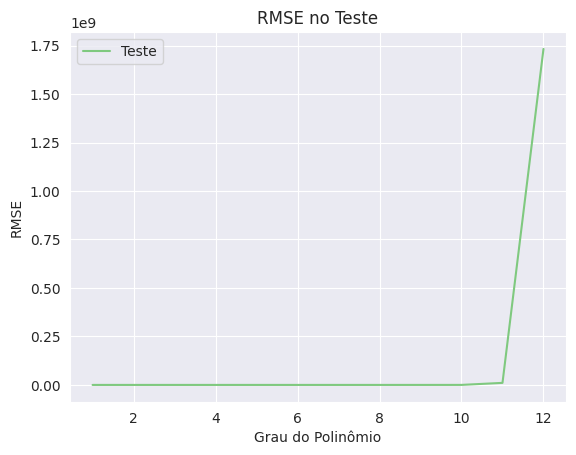

In [100]:
# Fazer previsões nos dados de teste para diferentes graus de polinômio
y_pred_teste = []
rmse_teste = []

y_teste_desnormalizado = standard_scaler.inverse_transform(y_teste.reshape(-1, 1)).flatten()

for grau in range(1, len(graus)+1):

    y_pred_teste_atual = treinando_modelo_para_teste(x_treino, y_treino, x_teste, grau)
    y_pred_teste_atual_desnormalizado = standard_scaler.inverse_transform(y_pred_teste_atual.reshape(-1, 1)).flatten()

    rmse_atual = raiz_erro_quadratico_medio(y_teste_desnormalizado, y_pred_teste_atual_desnormalizado)

    y_pred_teste.append(y_pred_teste_atual_desnormalizado)
    rmse_teste.append(rmse_atual)
    print("RMSE no conjunto de teste:", rmse_teste)

# Plotar RMSE no teste
plt.plot(range(1, len(graus)+1), rmse_teste, label='Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE no Teste')
plt.legend()
plt.show()


In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for i, ax in enumerate(axs.flat):
    grau = 12 - i
    sns.histplot(y_pred_teste[grau], kde=True, stat="frequency", color='skyblue', bins=20, ax=ax)
    ax.set_title(f'Distribuição de Frequência do grau {grau}', fontsize=12)
    ax.set_xlabel('Valores Previstos de teste', fontsize=10)
    ax.set_ylabel('Frequência', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


##d) Repita os 2 itens anteriores incluindo um termo de regularização L2
##(por exemplo, com fator λ = 0.01).

In [76]:
def OLS(x, y, alpha=0.01):
    """
    Calcula os parâmetros do modelo de regressão linear utilizando a equação normal.

    Parâmetros:
    - x: matriz de características
    - y: vetor de saída
    - alpha: parâmetro de regularização (padrão: 0.01)

    Retorna:
    - theta: vetor de parâmetros do modelo
    """

    # Verificar se a primeira coluna de x é composta por 1s
    if np.all(x[:, 0] == 1):
        matriz_x = x
    else:
        # Adicionando a primeira coluna de 1s à matriz de características
        matriz_x = np.hstack((np.ones((x.shape[0], 1)), x))

    # Calcular os parâmetros do modelo de regressão linear
    matriz_x_transposta = matriz_x.T
    produto_matriz = matriz_x_transposta @ matriz_x
    # Adicionando regularização à diagonal da matriz
    produto_matriz += alpha * np.eye(produto_matriz.shape[0])
    inverso_da_matriz = np.linalg.inv(produto_matriz)
    theta = inverso_da_matriz @ matriz_x_transposta @ y
    return theta


In [77]:
def treinando_modelo_treino(x, y, grau):

  # Calculando o polinomio da função
  funcao_polinomial = polinomial(x, grau)

  # Calculando os coeficientes da função
  w = OLS(funcao_polinomial , y)

  # Calculando os valores previstos de y
  y_previsto =  np.dot(funcao_polinomial, w)

  return y_previsto

#Com Treino regularização

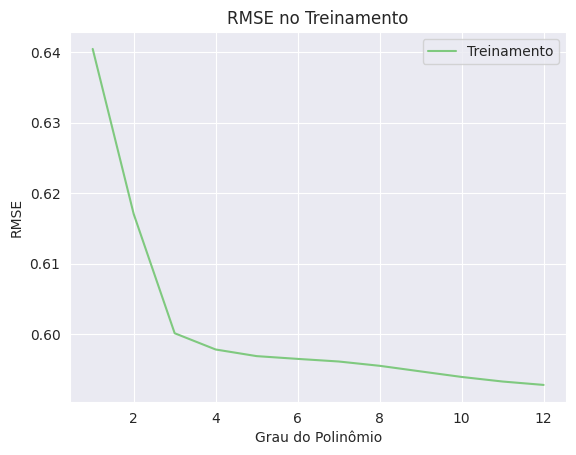

RMSE no conjunto de teste: [0.640479705038704, 0.6170374391145266, 0.6001002760465785, 0.5977922273685882, 0.5968509026111721, 0.5964582645297036, 0.5960888035184675, 0.5954764260482244, 0.5946814621852744, 0.5938940840846249, 0.5932432499847189, 0.5927614896817581]


In [78]:
# Definindo listas para armazenar as previsões e RMSEs
y_pred_treino = []
rmse_treino = []

graus = list(range(1, 13))

# Desnormalizar y_treino
y_treino_desnormalizado = standard_scaler.inverse_transform(y_treino.reshape(-1, 1)).flatten()

# Loop sobre os diferentes graus de polinômio
for grau in range(1, len(graus)+1):
    # Fazer previsões nos dados de treinamento para o grau atual
    y_pred_atual = treinando_modelo_treino(x_treino, y_treino, grau)

    # Adicionar as previsões ao conjunto de previsões de treinamento
    y_pred_treino.append(y_pred_atual)

    # Calcular o RMSE para as previsões atuais
    rmse_atual = raiz_erro_quadratico_medio(y_treino_desnormalizado, standard_scaler.inverse_transform(y_pred_atual.reshape(-1, 1)).flatten())

    # Adicionar o RMSE à lista de RMSEs de treinamento
    rmse_treino.append(rmse_atual)

# Plotar RMSE no treinamento
plt.plot(range(1, len(graus)+1), rmse_treino, label='Treinamento')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE no Treinamento')
plt.legend()
plt.show()
print("RMSE no conjunto de treino:", rmse_treino)

#Com Teste regularização

In [79]:
def treinando_modelo_teste(x_treino, y_treino, x_teste, grau):
    # Calculando o polinomio da função para os dados de treinamento
    funcao_polinomial_treino = polinomial(x_treino, grau)

    # Calculando os coeficientes da função usando os dados de treinamento
    coeficientes = OLS(funcao_polinomial_treino, y_treino)

    # Calculando o polinomio da função para os dados de teste
    funcao_polinomial_teste = polinomial(x_teste, grau)

    # Calculando os valores previstos de y
    y_previsto = np.dot(funcao_polinomial_teste, coeficientes)

    return y_previsto


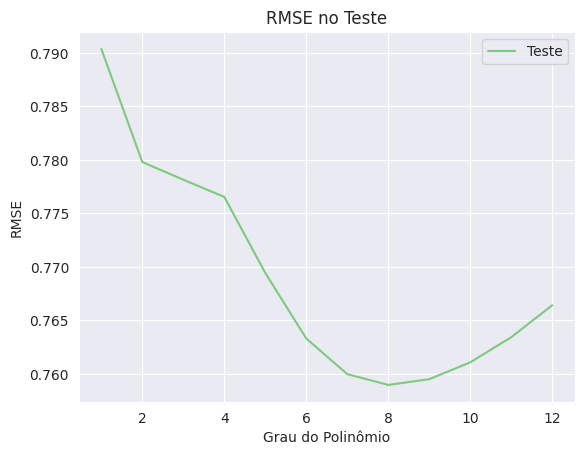

RMSE no conjunto de teste: [0.790378561909657, 0.7798031499247549, 0.7781526659535268, 0.7765467712436112, 0.7694407709442146, 0.7633144692191888, 0.7599842008303921, 0.7589760946271553, 0.7595115393053798, 0.7610884342988291, 0.7634358257743037, 0.7664241473842017]


In [80]:
# Fazer previsões nos dados de teste para diferentes graus de polinômio
y_pred_teste = []
rmse_teste = []

y_teste_desnormalizado = standard_scaler.inverse_transform(y_teste.reshape(-1, 1)).flatten()

for grau in range(1, len(graus)+1):
    y_pred_teste_atual = treinando_modelo_teste(x_treino, y_treino, x_teste, grau)
    y_pred_teste_atual_desnormalizado = standard_scaler.inverse_transform(y_pred_teste_atual.reshape(-1, 1)).flatten()
    y_teste_desnormalizado = standard_scaler.inverse_transform(y_teste.reshape(-1, 1)).flatten()
    rmse_atual = raiz_erro_quadratico_medio(y_teste_desnormalizado, y_pred_teste_atual_desnormalizado)

    y_pred_teste.append(y_pred_teste_atual_desnormalizado)
    rmse_teste.append(rmse_atual)

# Plotar RMSE no teste
plt.plot(range(1, len(graus)+1), rmse_teste, label='Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE no Teste')
plt.legend()
plt.show()
print("RMSE no conjunto de teste:", rmse_teste)